In [1]:
from keras.datasets import fashion_mnist
import numpy as np

(x_train, _), (x_test, _) = fashion_mnist.load_data()

x_train = x_train.astype('float32') / 255.
x_test = x_test.astype('float32') / 255.

Exception: URL fetch failure on https://storage.googleapis.com/tensorflow/tf-keras-datasets/train-labels-idx1-ubyte.gz: None -- [SSL: CERTIFICATE_VERIFY_FAILED] certificate verify failed: unable to get local issuer certificate (_ssl.c:1000)

In [ ]:
x_train.shape

In [ ]:
x_train = x_train.reshape((len(x_train), np.prod(x_train.shape[1:])))
x_test = x_test.reshape((len(x_test), np.prod(x_test.shape[1:])))

print(x_train.shape)
print(x_test.shape)


In [ ]:
import keras
from keras import layers

encoding_dim = 32  # Size of our encoded representations 

input_img = keras.Input(shape=(x_train.shape[1],))                   # Input image
encoded = layers.Dense(256, activation='relu')(input_img)   # "encoded" is encoded representation of  input
encoded = layers.Dense(128, activation='relu')(encoded)   # "encoded" is encoded representation of  input

encoded = layers.Dense(encoding_dim, activation='relu')(encoded)   # "encoded" is encoded representation of  input

decoded = layers.Dense(128, activation='relu')(encoded)   # "encoded" is encoded representation of  input
decoded = layers.Dense(256, activation='relu')(decoded)   # "encoded" is encoded representation of  input


decoded = layers.Dense(784, activation='sigmoid')(decoded)           # "decoded" is lossy reconstruction of  input
autoencoder = keras.Model(input_img, decoded)                        # This model maps an input to its reconstruction

autoencoder.compile(optimizer='adam', loss='binary_crossentropy')
autoencoder.summary(0)

In [ ]:
autoencoder.fit(x_train, x_train, epochs=10, batch_size=256, shuffle=True,
                validation_data=(x_test, x_test))


In [6]:
x_testr = keras.Model(input_img, encoded)            # This model maps an input to its encoded representation
encoded_input = keras.Input(shape=(encoding_dim,))   # This is our encoded (32-dimensional) input

decoder = keras.Model(encoded_input, decoder_layer(encoded_input))  # Create the decoder model
decoded_imgs = decoder.predict(encoded_imgs)

import matplotlib.pyplot as plt

print('First row is orignal images')
n = 10  # How many digits we will display
plt.figure(figsize=(20, 4))
for i in range(n):
    # Display original
    ax = plt.subplot(2, n, i + 1)
    plt.imshow(x_test[i].reshape(28, 28))
    plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)

    # Display reconstruction
    ax = plt.subplot(2, n, i + 1 + n)
    plt.imshow(decoded_imgs[i].reshape(28, 28))
    plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)
plt.show()
print('Second row is reconstrcuted images')

NameError: name 'decoder_layer' is not defined

Encoded representations


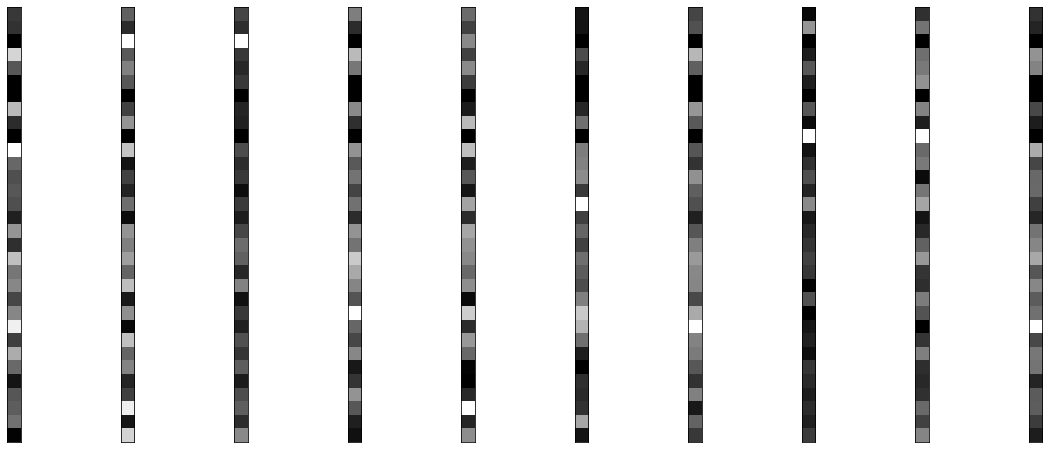

In [34]:
encoder = keras.Model(input_img, encoded)           # This model maps an input to its encoded representation
encoded_imgs = encoder.predict(x_test)              # This is our encoded (32-dimensional) input

print('Encoded representations')
n = 10
plt.figure(figsize=(20, 8))
for i in range(1, n + 1):
    ax = plt.subplot(1, n, i)
    plt.imshow(encoded_imgs[i].reshape((1, 4 * 8)).T)
    plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)
plt.show()
